In [1]:
import numpy as np 
import pandas as pd

Data Importing

In [2]:
df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
print(df)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0        1743-11-01               6.068                          1.737   
1        1743-12-01                 NaN                            NaN   
2        1744-01-01                 NaN                            NaN   
3        1744-02-01                 NaN                            NaN   
4        1744-03-01                 NaN                            NaN   
...             ...                 ...                            ...   
8599207  2013-05-01              11.464                          0.236   
8599208  2013-06-01              15.043                          0.261   
8599209  2013-07-01              18.775                          0.193   
8599210  2013-08-01              18.025                          0.298   
8599211  2013-09-01                 NaN                            NaN   

           City      Country Latitude Longitude  
0         Århus      Denmark   57.05N    10.33E  
1         Å

Data cleaning

In [4]:
df = df.dropna()

large = df

In [5]:
df = df.sample(frac=0.001)

In [6]:
LatNumber = []
for lat in df["Latitude"]:
    if("N" in lat):
        lat = lat.replace("N","")
        lat = float(lat)
    else:
        lat = lat.replace("S","")
        lat = -float(lat)
    LatNumber.append(lat)

df["LatNumber"]=np.array(LatNumber)

LonNumber = []
for lon in df["Longitude"]:
    if("E" in lon):
        lon = lon.replace("E","")
        lon = float(lon)
    else:
        lon = lon.replace("W","")
        lon = -float(lon)
    LonNumber.append(lon)

df["LonNumber"]=np.array(LonNumber)

In [7]:
print(df)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
4521320  1978-07-01              27.201                          0.633   
4495143  1957-02-01              -1.930                          0.347   
4521036  1954-11-01               8.559                          0.497   
2690743  1951-01-01              25.419                          0.755   
5929835  1837-01-01              -1.151                          2.593   
...             ...                 ...                            ...   
2123321  1928-01-01              18.027                          0.585   
896922   1995-04-01              29.952                          0.538   
6295886  1856-07-01              15.542                          0.517   
7703905  1983-01-01              -5.897                          0.297   
7905510  1906-12-01               6.104                          0.878   

                   City         Country Latitude Longitude  LatNumber  \
4521320         Mahabad            Ira

In [8]:
df.describe()

,AverageTemperature,AverageTemperatureUncertainty,LatNumber,LonNumber
count,8235.000000,8235.000000,8235.000000,8235.000000
mean,16.502663,1.059638,26.618143,30.477296
std,10.526448,1.174348,22.687475,71.814867
min,-28.918000,0.062000,-52.240000,-123.460000
25%,9.732000,0.339000,15.270000,-4.260000
50%,18.694000,0.615000,32.950000,31.380000
75%,25.097500,1.370000,42.590000,88.250000
max,36.358000,12.150000,69.920000,175.030000


Data Visualising

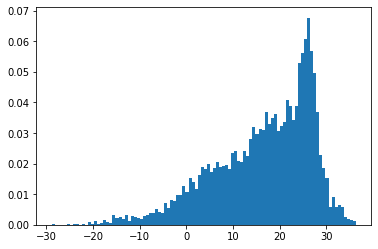

In [9]:
import matplotlib.pyplot as plt

plt.hist(df["AverageTemperature"],density=True,bins=100)
plt.show()

In [10]:
found = []
for city in df["City"]:
    if(city>"N" and city<"O"):
        if(not city in found):
            print(city)
            found.append(city)

Nancy
Narita
Netanya
Nis
Niamey
Norwich
Norfolk
Nalchik
Noginsk
Namangan
Nelspruit
Nalgonda
Nawabganj
Nanjing
Novokuznetsk
Nsukka
Nagda
Numazu
Nanchang
Nîmes
Naperville
Neftekamsk
Nazran
Nakhon Pathom
Nigel
Nukus
Nadiad
Nakhodka
New Delhi
Neiva
Novomoskovsk
Niihama
Neuss
Nizhnevartovsk
Nijmegen
Nazilli
Nobeoka
Nampula
Niterói
Newark
Nassau
Nawabshah
Nakuru
Nkongsamba
Newcastle Upon Tyne
Naucalpan
Neyshabur
Novocheboksarsk
Nazret
Nanchong
Ningbo
Namur
Nishinomiya
Neyagawa
Naihati
Nevinnomyssk
Nam Dinh
Nanning
Ndola
Novocherkassk
Nossa Senhora Do Socorro
Novi Sad
New York
Nagoya
Nagaoka
Nashville
Nandyal
New Haven
Novara
North Las Vegas
Norilsk
Nueva San Salvador
Navadwip
Nnewi
Nicolás Romero
Nuremberg
Norwalk
Nottingham
Novo Hamburgo
Nanpiao
Naga
Nuevo Laredo
Nova Friburgo
Natal
Nakhon Ratchasima
Norman
Nacala
Nantong
Newport News
Nonthaburi
Noda
Novotroitsk
Nagareyama
Nagercoil
Nha Trang
Nice
Navsari
Nancha
Narsingdi
Ngaoundéré
Novorossiysk
Nyíregyháza
Nantou
Neyveli
Niigata
Nador
Nand

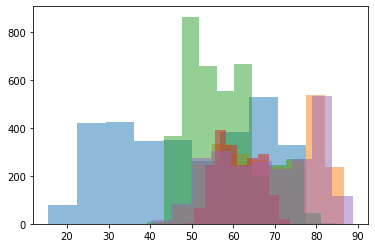

In [11]:

NY = large[large["City"]=="New York"]


plt.hist(NY["AverageTemperature"]*9/5+32,bins=10,alpha=0.5)


NO = large[large["City"]=="New Orleans"]

LA = large[large["City"]=="Los Angeles"]
SD = large[large["City"]=="San Diego"]
HS = large[large["City"]=="Houston"]

plt.hist(NO["AverageTemperature"]*9/5+32,bins=10,alpha=0.5)
plt.hist(LA["AverageTemperature"]*9/5+32,bins=10,alpha=0.5)
plt.hist(SD["AverageTemperature"]*9/5+32,bins=10,alpha=0.5)
plt.hist(HS["AverageTemperature"]*9/5+32,bins=10,alpha=0.5)
plt.show()

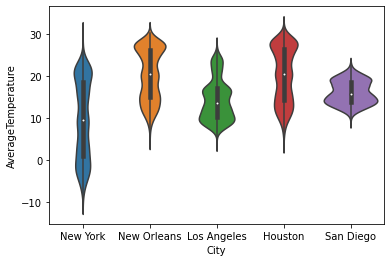

In [12]:
import seaborn as sns

cities = pd.concat([NY,NO,LA, HS, SD])

sns.violinplot(data=cities,y="AverageTemperature",x="City")
plt.show()

In [13]:
BeforeAfter = []
for dt in df["dt"]:
    if(dt<"1950-01-01"):
        BeforeAfter.append("Before")
    else:
        BeforeAfter.append("After")
  
df['BeforeAfter'] = BeforeAfter

In [14]:
print(df)

                 dt  AverageTemperature  AverageTemperatureUncertainty  \
4521320  1978-07-01              27.201                          0.633   
4495143  1957-02-01              -1.930                          0.347   
4521036  1954-11-01               8.559                          0.497   
2690743  1951-01-01              25.419                          0.755   
5929835  1837-01-01              -1.151                          2.593   
...             ...                 ...                            ...   
2123321  1928-01-01              18.027                          0.585   
896922   1995-04-01              29.952                          0.538   
6295886  1856-07-01              15.542                          0.517   
7703905  1983-01-01              -5.897                          0.297   
7905510  1906-12-01               6.104                          0.878   

                   City         Country Latitude Longitude  LatNumber  \
4521320         Mahabad            Ira

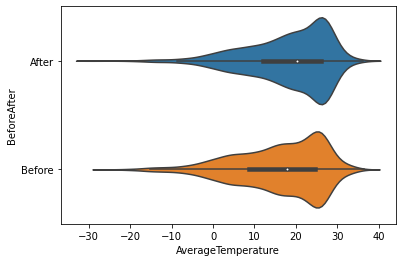

In [15]:
sns.violinplot(data=df,x="AverageTemperature",y="BeforeAfter")
plt.show()

In [16]:
print(np.mean(df[df["BeforeAfter"]=="Before"]["AverageTemperature"]))
print(np.mean(df[df["BeforeAfter"]=="After"]["AverageTemperature"]))

15.809549519059495
17.98726478443342


In [17]:
from scipy.stats import ttest_ind

result = ttest_ind(df[df["BeforeAfter"]=="Before"]["AverageTemperature"], 
          df[df["BeforeAfter"]=="After"]["AverageTemperature"])

print(result)

Ttest_indResult(statistic=-8.785307996428573, pvalue=1.875139923738692e-18)


In [18]:
ttest_ind([1,2,1,3,2],[5,6,3,4,8])

Ttest_indResult(statistic=-3.6244121780453775, pvalue=0.006739363530916308)

In [19]:
print(df.columns)

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude', 'LatNumber', 'LonNumber',
       'BeforeAfter'],
      dtype='object')


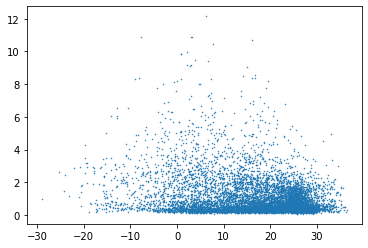

In [20]:
plt.scatter(df["AverageTemperature"],
            df["AverageTemperatureUncertainty"],
           s=1,marker=".")
plt.show()

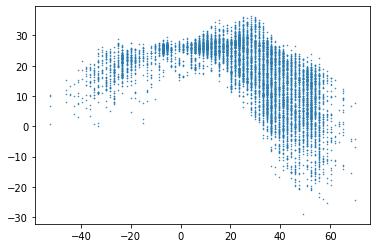

In [21]:
plt.scatter(df["LatNumber"],
            df["AverageTemperature"],
           s=1,marker=".")
plt.show()

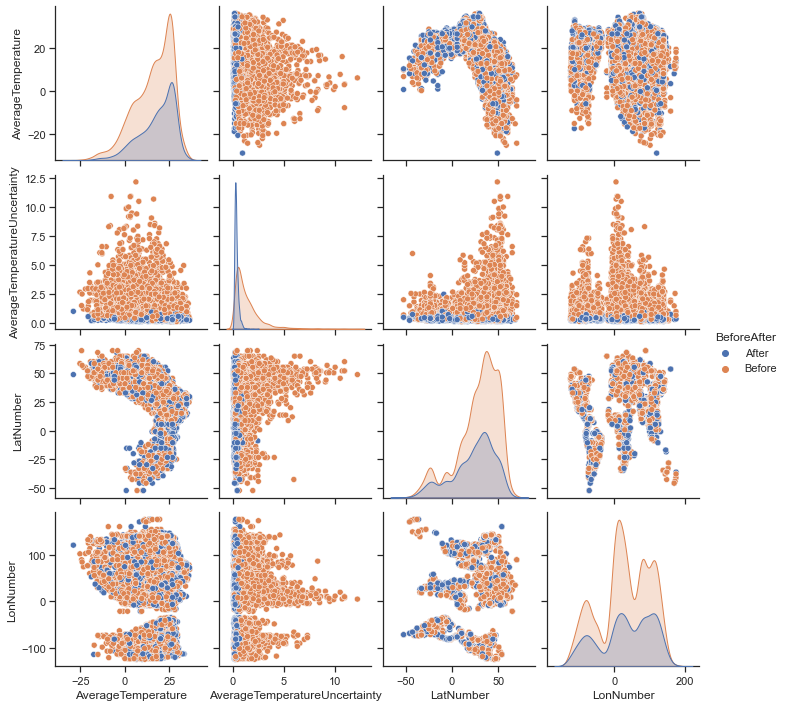

In [22]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="BeforeAfter")

In [23]:
print(df.corr())

                               AverageTemperature  \
AverageTemperature                       1.000000   
AverageTemperatureUncertainty           -0.248688   
LatNumber                               -0.500511   
LonNumber                                0.044964   

                               AverageTemperatureUncertainty  LatNumber  \
AverageTemperature                                 -0.248688  -0.500511   
AverageTemperatureUncertainty                       1.000000   0.208487   
LatNumber                                           0.208487   1.000000   
LonNumber                                          -0.078246   0.083768   

                               LonNumber  
AverageTemperature              0.044964  
AverageTemperatureUncertainty  -0.078246  
LatNumber                       0.083768  
LonNumber                       1.000000  
